# Random foreast regressor

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import math

In [2]:
file ='data/task_df.csv'
df=pd.read_csv(file,index_col='date')
df

,kr_Export,kr2cn,kr2us,kr2ve,kr2hk,kr2jp,sum,exrusd,nasdaq,sanghai,nikkei,gold,kospi,vni,samsung,skhynix,ex6
date,,,,,,,,,,,,,,,,,
2003-09-01,17021082330,3274210504,3034998707,192545654,1274404786,1437461044,9213620695,1149,1786,1367,10219,386,697,139.32,392000.0,6710.0,2.117485e+10
2003-10-01,18929664626,3540626175,3425960263,239220981,1518784077,1725329265,10449920761,1183,1932,1348,10559,384,782,136.21,470000.0,7530.0,2.148336e+10
2003-11-01,18242088134,3448459677,3213552727,222750947,1511066342,1698328371,10094158064,1202,1960,1397,10100,396,796,163.87,465000.0,6630.0,2.083426e+10
2003-12-01,19728688098,3830128278,3472926852,248904759,1794107234,1664844557,11010911680,1192,2003,1497,10676,416,810,166.94,451000.0,5600.0,2.165711e+10
2004-01-01,18987120155,3320938836,2644698134,163655810,1752427343,1552892077,9434612200,1171,2066,1590,10783,402,848,214.32,524000.0,8950.0,2.100379e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,44706906918,11208799453,6396234633,3907994035,2516268543,2191909157,26221205821,1123,13192,3509,28966,1728,3012,1168.47,82500.0,141500.0,5.316510e+10
2021-03-01,53690914321,13408119054,7970755898,4207078759,3402418498,2415077031,31403449240,1127,13246,3441,29178,1715,3061,1191.44,81400.0,132500.0,5.591386e+10
2021-04-01,51225991397,13401058327,7557229358,4334987144,2985366252,2489524820,30768165901,1117,13962,3446,28812,1767,3147,1239.39,81500.0,128000.0,5.566037e+10


In [3]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
# 데이터 프레임으로 저장
df = pd.DataFrame(df)

In [4]:
df2=pd.read_csv('data/task_df.csv',index_col='date')
df2.reset_index(inplace=True)
df2.columns

Index(['date', 'kr_Export', 'kr2cn', 'kr2us', 'kr2ve', 'kr2hk', 'kr2jp', 'sum',
       'exrusd', 'nasdaq', 'sanghai', 'nikkei', 'gold', 'kospi', 'vni',
       'samsung', 'skhynix', 'ex6'],
      dtype='object')

In [5]:
df.set_index(df2['date'],inplace=True)
df.columns = ['kr_Export', 'kr2cn', 'kr2us', 'kr2ve', 'kr2hk', 'kr2jp', 'sum',
       'exrusd', 'nasdaq', 'sanghai', 'nikkei', 'gold', 'kospi', 'vni',
       'samsung', 'skhynix','ex6']
df.head()

,kr_Export,kr2cn,kr2us,kr2ve,kr2hk,kr2jp,sum,exrusd,nasdaq,sanghai,nikkei,gold,kospi,vni,samsung,skhynix,ex6
date,,,,,,,,,,,,,,,,,
2003-09-01,0.000000,0.000000,0.066846,0.005689,0.060485,0.000000,0.000000,0.393365,0.031160,0.062730,0.122675,0.001249,0.000000,0.002444,0.523927,0.008168,0.033611
2003-10-01,0.050102,0.023181,0.131051,0.014879,0.123755,0.126133,0.052796,0.447077,0.042282,0.058848,0.138408,0.000000,0.032705,0.000000,0.630633,0.014202,0.041148
2003-11-01,0.032052,0.015162,0.096169,0.011636,0.121757,0.114302,0.037603,0.477093,0.044416,0.068860,0.117168,0.007495,0.038092,0.021739,0.623793,0.007579,0.025291
2003-12-01,0.071077,0.048371,0.138764,0.016786,0.195038,0.099631,0.076753,0.461295,0.047692,0.089293,0.143822,0.019988,0.043478,0.024152,0.604640,0.000000,0.045392
2004-01-01,0.051610,0.004066,0.002750,0.000000,0.184247,0.050577,0.009437,0.428120,0.052491,0.108296,0.148774,0.011243,0.058099,0.061391,0.704506,0.024650,0.029433


In [6]:
Y=df.iloc[:,-1]
X=df.iloc[:,:-1]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.02, random_state=777)

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(209, 16) (5, 16) (209,) (5,)


In [9]:
model = RandomForestRegressor(random_state=1)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [10]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9871463107647052
0.9695450064715874


# 예측하기

In [11]:
y_predict = model.predict(x_test)

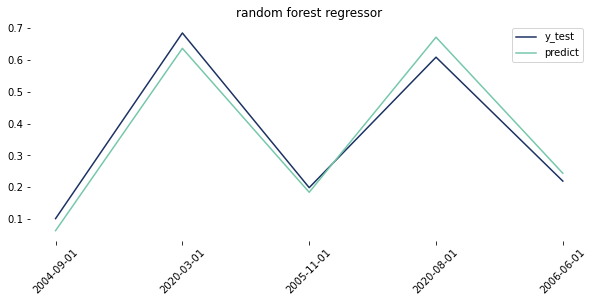

In [12]:
plt.figure(figsize=(10,4))
plt.plot(y_test,color='#1C3263', label='y_test')
plt.plot(y_predict,color='#76C8AA', label='predict')
plt.xticks(rotation=45)
#plt.gca().axes.xaxis.set_visible(False) # x축 없애기
plt.legend()
plt.title('random forest regressor')
plt.box(False)

#plt.savefig('RF예측결과2', dpi=500, transparent = True) # 배경 투명
plt.show()

In [13]:
fim=model.feature_importances_
print(fim, x_train.columns)

[0.02210509 0.02480328 0.00751864 0.0342683  0.01304233 0.0117922
 0.03692377 0.0088065  0.01106749 0.0375504  0.00771332 0.69933799
 0.06184668 0.01039022 0.00635064 0.00648317] Index(['kr_Export', 'kr2cn', 'kr2us', 'kr2ve', 'kr2hk', 'kr2jp', 'sum',
       'exrusd', 'nasdaq', 'sanghai', 'nikkei', 'gold', 'kospi', 'vni',
       'samsung', 'skhynix'],
      dtype='object')


In [14]:
# mse rmse
rf_run_predict = model.predict(X)
print("MSE:{}".format(mean_squared_error(rf_run_predict, Y)))
print("RMSE:{}".format(math.sqrt(mean_squared_error(rf_run_predict, Y))) )

MSE:0.0007311098479354636
RMSE:0.027039043029209883


In [15]:
import sklearn.metrics as metrics
import math

mae = metrics.mean_absolute_error(rf_run_predict, Y)
mse = metrics.mean_squared_error(rf_run_predict, Y)

print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("MSE:                ", mse)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model.score(X,Y))
print ("feature_importances:",model.feature_importances_)
print ("n_features:         ",model.n_features_)
print ("n_outputs:          ",model.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

TRAINING SET
MAE:                 0.01996556026545228
MSE:                 0.0007311098479354636
RMSE:                0.027039043029209883
r2:                  0.9868310893324521
feature_importances: [0.02210509 0.02480328 0.00751864 0.0342683  0.01304233 0.0117922
 0.03692377 0.0088065  0.01106749 0.0375504  0.00771332 0.69933799
 0.06184668 0.01039022 0.00635064 0.00648317]
n_features:          16
n_outputs:           1
last column (% Iron Concentrate) is the highest feature_importances


C:\Users\totqu\anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


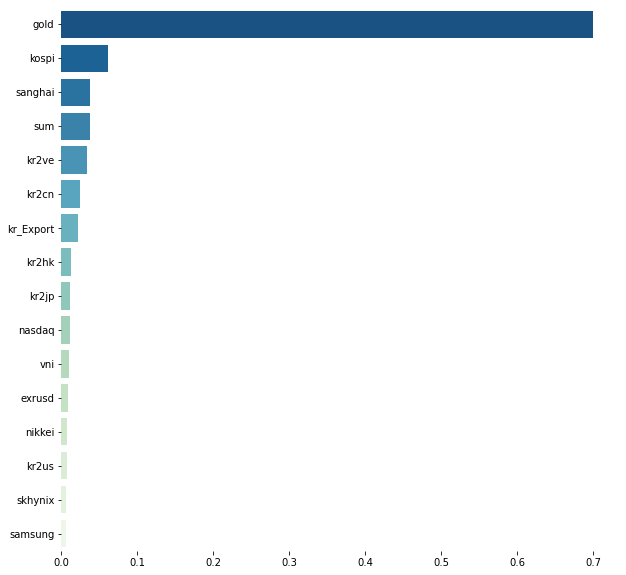

In [16]:
plt.figure(figsize=(10,10))
fdata=pd.Series(fim,index=x_train.columns)
sfdata=fdata.sort_values(ascending=False)
sns.barplot(x=sfdata, y=sfdata.index , palette='GnBu_r')
plt.box(False)
plt.savefig('img2/feature importances2', dpi=500, transparent = True, bbox_inches='tight') # 배경 투명

# 20개월 추정

In [17]:
y_check=Y[-20:]
x_check=X[-20:]

In [18]:
x_check

,kr_Export,kr2cn,kr2us,kr2ve,kr2hk,kr2jp,sum,exrusd,nasdaq,sanghai,nikkei,gold,kospi,vni,samsung,skhynix
date,,,,,,,,,,,,,,,,
2019-11-01,0.709286,0.749576,0.597293,0.765646,0.366051,0.426398,0.762605,0.442338,0.555234,0.370045,0.727672,0.679575,0.534821,0.655910,0.056472,0.554084
2019-12-01,0.752012,0.785079,0.622479,0.731644,0.406072,0.376390,0.780932,0.401264,0.578623,0.406620,0.744470,0.711430,0.577145,0.648239,0.063996,0.651214
2020-01-01,0.684671,0.554069,0.511127,0.771448,0.298508,0.437063,0.635401,0.464455,0.592183,0.391500,0.723600,0.751405,0.547134,0.629085,0.064817,0.646799
2020-02-01,0.627150,0.482973,0.542531,0.741916,0.389956,0.362616,0.610096,0.473934,0.547768,0.371884,0.628135,0.738289,0.496345,0.586306,0.061807,0.605592
2020-03-01,0.765107,0.641208,0.764174,0.755072,0.551984,0.459015,0.784368,0.502370,0.481716,0.345321,0.525174,0.757027,0.406695,0.413663,0.052984,0.571744
2020-04-01,0.505303,0.598398,0.435072,0.502174,0.346562,0.239762,0.567677,0.492891,0.572299,0.367797,0.584220,0.818239,0.480954,0.497430,0.056062,0.574687
2020-05-01,0.468141,0.649929,0.322108,0.542317,0.342146,0.150849,0.562905,0.522907,0.618010,0.366163,0.662147,0.853841,0.512505,0.572378,0.057019,0.558499
2020-06-01,0.582582,0.710794,0.510334,0.657728,0.335753,0.180690,0.668608,0.472354,0.661359,0.393134,0.681166,0.884447,0.542901,0.541443,0.059892,0.584989
2020-07-01,0.676326,0.735413,0.651806,0.795380,0.257234,0.246158,0.740762,0.462875,0.713698,0.459747,0.654419,1.000000,0.597153,0.520443,0.066869,0.568065


In [19]:
y_ckeckpred = model.predict(x_check)

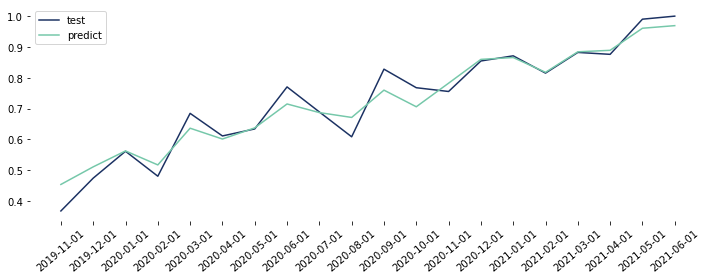

In [20]:
plt.figure(figsize=(10,4))
plt.plot(y_check, color='#1C3263', label='test')
plt.plot(y_ckeckpred, color='#76C8AA', label='predict')
plt.xticks(rotation=40)
plt.legend()
#plt.title('random foreast regressor')
plt.box(False)
plt.tight_layout()
plt.savefig('data/20month_pred.jpg', dpi=500, transparent = True, bbox_inches='tight')
plt.show()

# shap 시각화

In [26]:
import shap

In [27]:
# 전체
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value, shap_values, x_train)

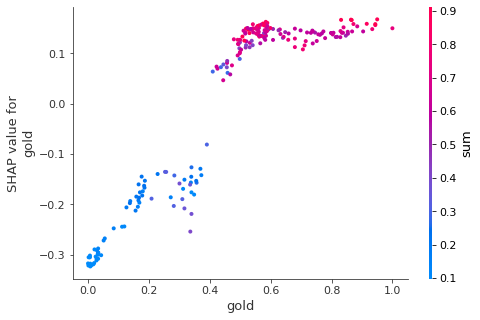

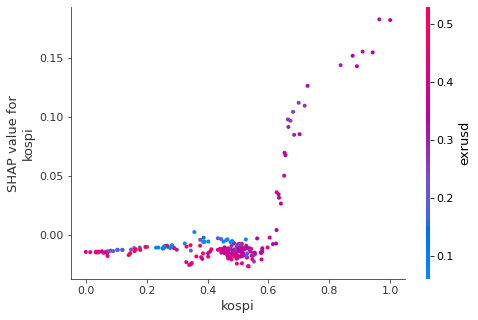

In [28]:
shap.initjs()
# 총 13개 특성의 Shapley value를 절댓값 변환 후 각 특성마다 더함 
# -> np.argsort()는 작은 순서대로 정렬, 큰 순서대로 정렬하려면 앞에 마이너스(-) 기호를 붙임
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# 영향력 top 2 컬럼
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, x_train)

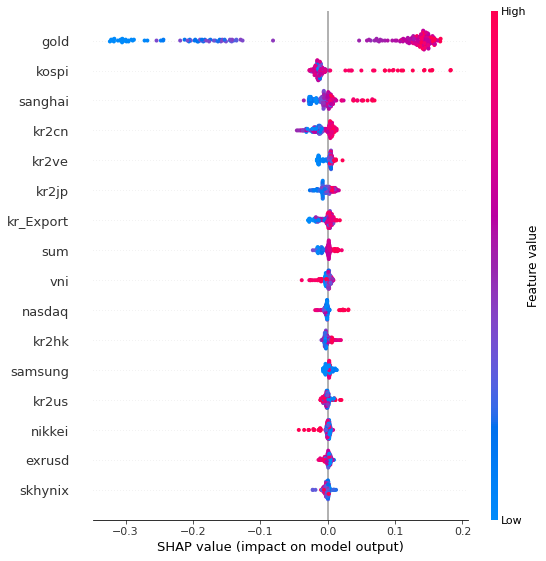

In [29]:
shap.summary_plot(shap_values, x_train)
# shap value의 절대값이 높은 순으로 나열
# 중앙선을 기점으로 왼쪽은 예측값이 낮아지는데, 오른쪽은 예측값이 높아지는데 영향을 줌

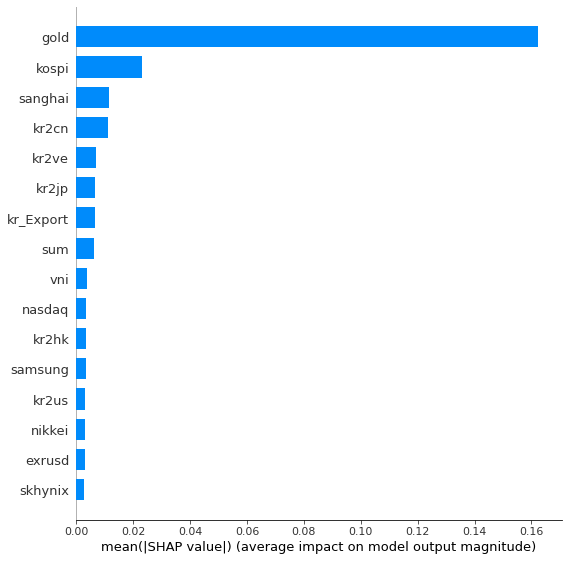

In [30]:
shap.summary_plot(shap_values, x_train, plot_type='bar')

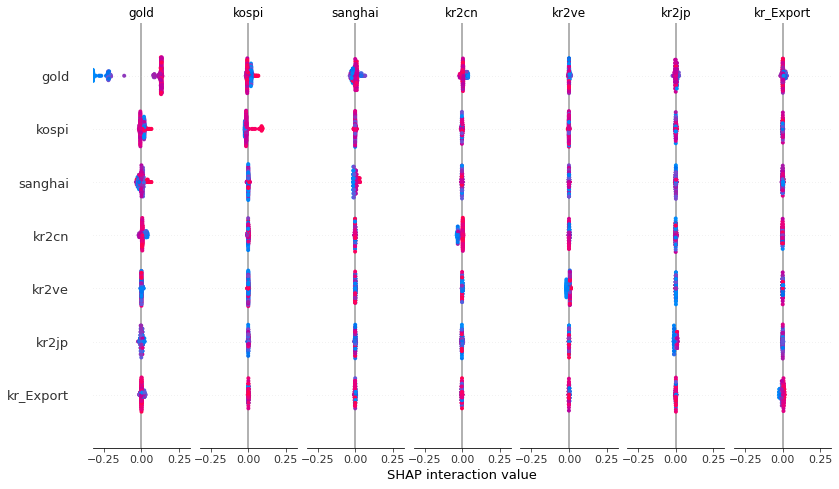

In [31]:
shap_interaction_values = explainer.shap_interaction_values(x_train)
shap.summary_plot(shap_interaction_values, x_train)